In [6]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 300, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
          


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 398, 298, 32)      320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 396, 296, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 198, 148, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 196, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 98, 73, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 35, 64)        0         
__________

In [15]:
PATH_TRAIN = 'D:\\BSU\\Datasets\\chest_xray\\train'
PATH_TEST = 'D:\\BSU\\Datasets\\chest_xray\\test'
PATH_VAL = 'D:\\BSU\\Datasets\\chest_xray\\val'
CLASSES = {'NORMAL' : 0, 'PNEUMONIA' : 1}

In [12]:
import os
import glob
import cv2
from tqdm import tqdm
import numpy as np

def get_set(path):
    imgs = []
    labels = []
    count = 0
    for img_class in CLASSES:
        class_path = os.path.join(path, img_class)
        print(img_class)
        for filename in tqdm(os.listdir(class_path)):
            if not '.jpeg' in filename:
                continue
            filepath = glob.glob(os.path.join(class_path, filename))[0]
            img = get_img(filepath)
            imgs.append(img)
            labels.append(CLASSES[img_class])
            count += 1
    print('Set from ' + path + ' uploaded. \nFiles ' + str(count))
    return np.array(imgs), np.array(labels)



def get_img(filepath):
    img = cv2.imread(filepath, 0)
    resized_image = cv2.resize(img, (400, 300)).reshape(400, 300, 1)
    norm_img = resized_image / 255
    return norm_img

In [20]:
val_set, val_labels = get_set(PATH_VAL)

NORMAL


100%|██████████| 9/9 [00:00<00:00, 70.87it/s]


PNEUMONIA


100%|██████████| 8/8 [00:00<00:00, 148.16it/s]


Set from D:\BSU\Datasets\chest_xray\val uploaded. 
Files 16


In [21]:
train_set, train_labels = get_set(PATH_TRAIN)

NORMAL


100%|██████████| 1341/1341 [00:36<00:00, 36.99it/s]


PNEUMONIA


100%|██████████| 3875/3875 [00:42<00:00, 91.28it/s] 


Set from D:\BSU\Datasets\chest_xray\train uploaded. 
Files 5216


In [25]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [26]:
history = model.fit(x=train_set, 
                    y=train_labels, 
                    batch_size=32, 
                    epochs=40, 
                    verbose=2, 
                    validation_data=(val_set, val_labels), 
                    shuffle=True)

model.save('D:\\BSU\\Datasets\\chest_xray\\chest_xray.h5')

Train on 5216 samples, validate on 16 samples
Epoch 1/40
 - 654s - loss: 0.2896 - acc: 0.8762 - val_loss: 0.2113 - val_acc: 1.0000
Epoch 2/40
 - 677s - loss: 0.1791 - acc: 0.9296 - val_loss: 0.8408 - val_acc: 0.6875
Epoch 3/40
 - 640s - loss: 0.1512 - acc: 0.9429 - val_loss: 1.0044 - val_acc: 0.6875
Epoch 4/40
 - 626s - loss: 0.1293 - acc: 0.9496 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 5/40
 - 613s - loss: 0.1181 - acc: 0.9538 - val_loss: 1.0962 - val_acc: 0.6250
Epoch 6/40
 - 615s - loss: 0.1083 - acc: 0.9603 - val_loss: 0.1667 - val_acc: 0.9375
Epoch 7/40
 - 613s - loss: 0.0983 - acc: 0.9636 - val_loss: 0.6777 - val_acc: 0.6875
Epoch 8/40
 - 613s - loss: 0.0888 - acc: 0.9678 - val_loss: 0.2882 - val_acc: 0.9375
Epoch 9/40
 - 613s - loss: 0.0819 - acc: 0.9693 - val_loss: 0.6430 - val_acc: 0.8125
Epoch 10/40
 - 608s - loss: 0.0768 - acc: 0.9732 - val_loss: 0.1912 - val_acc: 0.9375
Epoch 11/40
 - 610s - loss: 0.0710 - acc: 0.9749 - val_loss: 0.8392 - val_acc: 0.6250
Epoch 12/40
 - 61

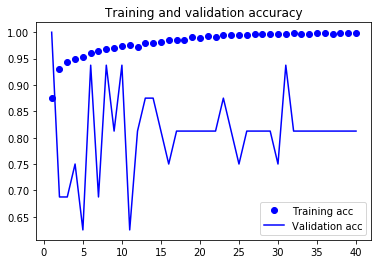

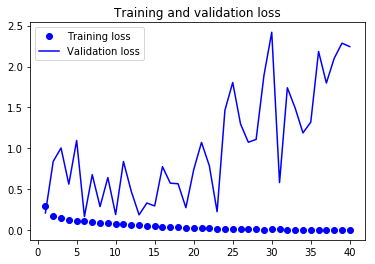

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
test_set, test_labels = get_set(PATH_TEST)

NORMAL


100%|██████████| 234/234 [00:04<00:00, 51.37it/s]


PNEUMONIA


100%|██████████| 390/390 [00:03<00:00, 99.26it/s] 


Set from D:\BSU\Datasets\chest_xray\test uploaded. 
Files 624


In [9]:
model = models.load_model('D:\\BSU\\Datasets\\chest_xray\\chest_xray.h5')

Instructions for updating:
Use tf.cast instead.


In [17]:
res = model.test_on_batch(test_set, test_labels)
print('loss, accuracy')
print(res)

loss, accuracy
[2.5503845, 0.775641]
